In [3]:
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
from wordcloud import WordCloud

In [4]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [5]:

print("First few rows of the dataset:")
print(train_data.head())


First few rows of the dataset:
   ENTITY_ID  CATEGORY_ID  ENTITY_LENGTH  \
0     216064          112     600.000000   
1    2498090         8360     984.251967   
2     210860           30     850.000000   
3     285757         6104     744.000000   
4    1869643         2201     600.000000   

                                  ENTITY_DESCRIPTION  
0                               Caricaturas (1892)    
1  VJ Interior Modern Solid Interio Cushioned Bar...  
2  Pam: Personalized Name Journal with Blank Line...  
3  Hio Nya Testamenti Drottins Vors Jesu Krists A...  
4  ADDIT Phone Case for Samsung Galaxy A50 [ Mili...  


In [6]:
print("\nData information:")
train_data.info()



Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ENTITY_ID           100000 non-null  int64  
 1   CATEGORY_ID         100000 non-null  int64  
 2   ENTITY_LENGTH       100000 non-null  float64
 3   ENTITY_DESCRIPTION  100000 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [7]:
print("\nMissing values in the dataset:")
print(train_data.isnull().sum())



Missing values in the dataset:
ENTITY_ID             0
CATEGORY_ID           0
ENTITY_LENGTH         0
ENTITY_DESCRIPTION    0
dtype: int64


In [8]:
print("\nSummary statistics of numerical columns:")
print(train_data.describe())



Summary statistics of numerical columns:
          ENTITY_ID    CATEGORY_ID  ENTITY_LENGTH
count  1.000000e+05  100000.000000  100000.000000
mean   1.481478e+06    3992.661350     846.074230
std    8.694148e+05    3969.245926     667.183486
min    2.200000e+01       0.000000       1.000000
25%    7.209542e+05     222.000000     500.000000
50%    1.470576e+06    2916.000000     629.921259
75%    2.233536e+06    6344.000000    1000.000000
max    2.999949e+06   13416.000000    4999.999995


In [9]:
print("\nUnique values in each column:")
for column in train_data.columns:
    print(f"{column}: {train_data[column].nunique()} unique values")



Unique values in each column:
ENTITY_ID: 100000 unique values
CATEGORY_ID: 6273 unique values
ENTITY_LENGTH: 3619 unique values
ENTITY_DESCRIPTION: 99856 unique values


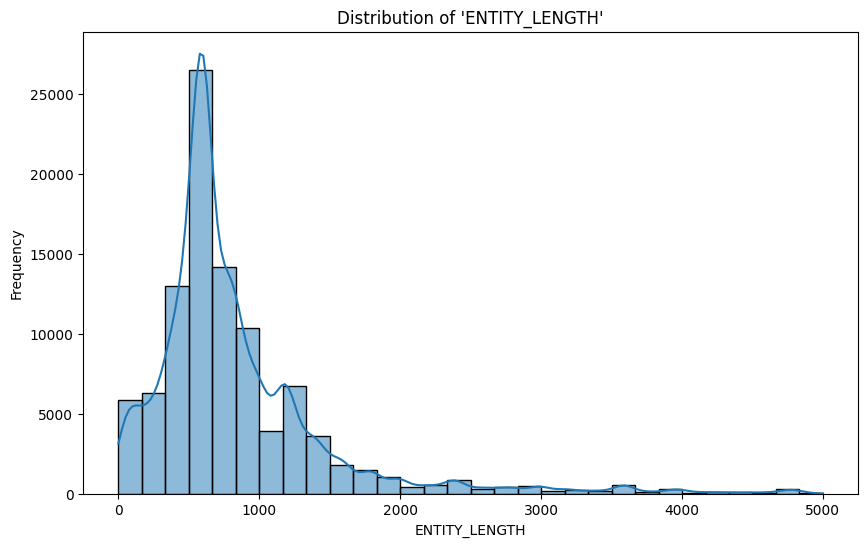

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['ENTITY_LENGTH'], bins=30, kde=True)
plt.title("Distribution of 'ENTITY_LENGTH'")
plt.xlabel('ENTITY_LENGTH')
plt.ylabel('Frequency')
plt.show()

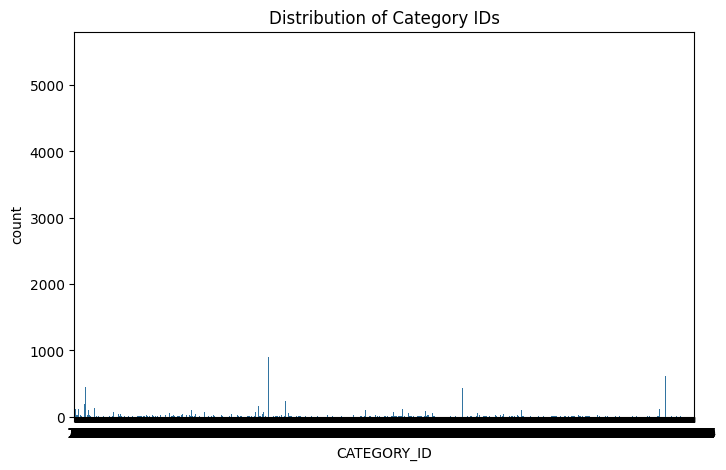

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='CATEGORY_ID', data=train_data)
plt.title('Distribution of Category IDs')
plt.show()

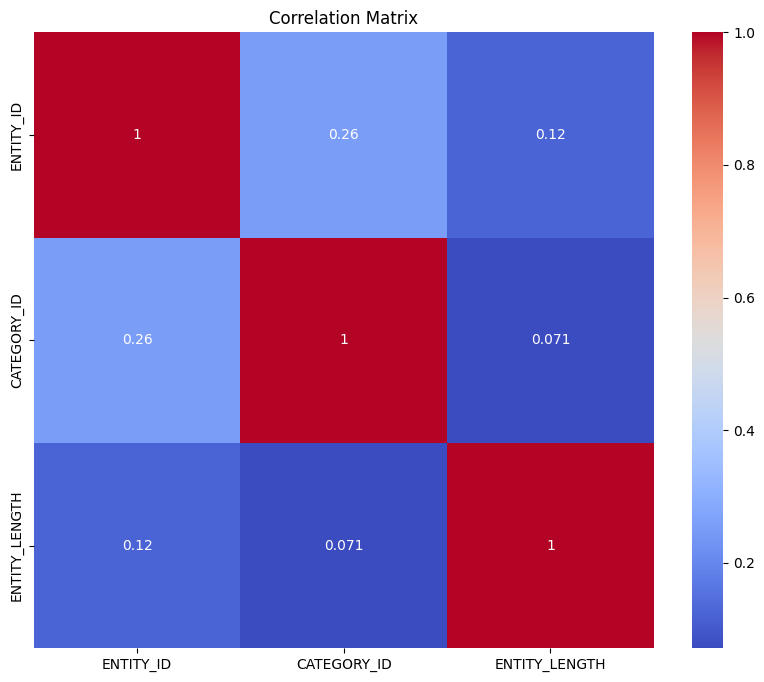

In [12]:
corr_matrix = train_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
train_data['DESC_LENGTH'] = train_data['ENTITY_DESCRIPTION'].apply(len)
print("\nDescription length statistics:")
print(train_data['DESC_LENGTH'].describe())


Description length statistics:
count    100000.000000
mean        688.469590
std         804.985852
min           1.000000
25%          74.000000
50%         348.000000
75%        1066.000000
max        6871.000000
Name: DESC_LENGTH, dtype: float64


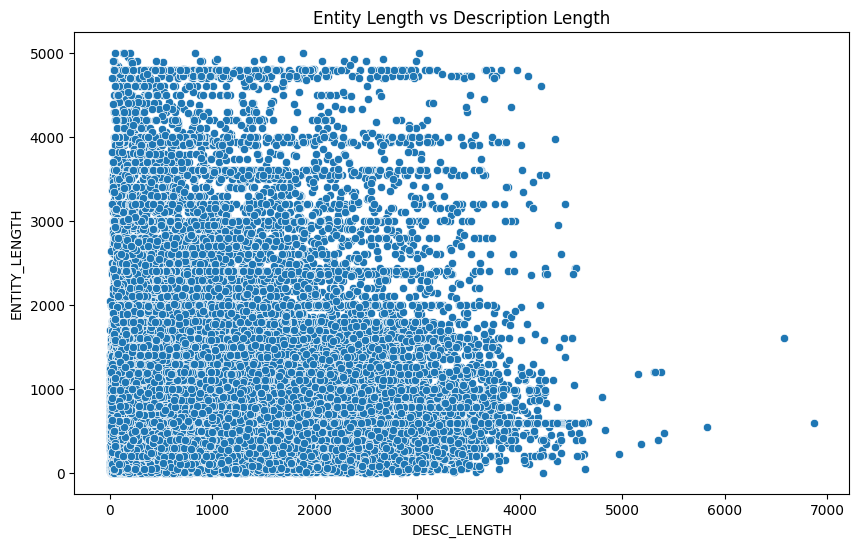

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DESC_LENGTH', y='ENTITY_LENGTH', data=train_data)
plt.title("Entity Length vs Description Length")
plt.show()

Text Preprocessing using NLP


In [15]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

In [17]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]


In [18]:
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]


In [19]:
def stem_tokens(tokens):
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in tokens]


In [20]:
train_data['CLEAN_TEXT'] = train_data['ENTITY_DESCRIPTION'].apply(clean_text)
train_data['TOKENS'] = train_data['CLEAN_TEXT'].apply(tokenize_and_remove_stopwords)
train_data['LEMMATIZED_TOKENS'] = train_data['TOKENS'].apply(lemmatize_tokens)
train_data['STEMMED_TOKENS'] = train_data['TOKENS'].apply(stem_tokens)


In [21]:
all_words = ' '.join([word for tokens in train_data['TOKENS'] for word in tokens])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)


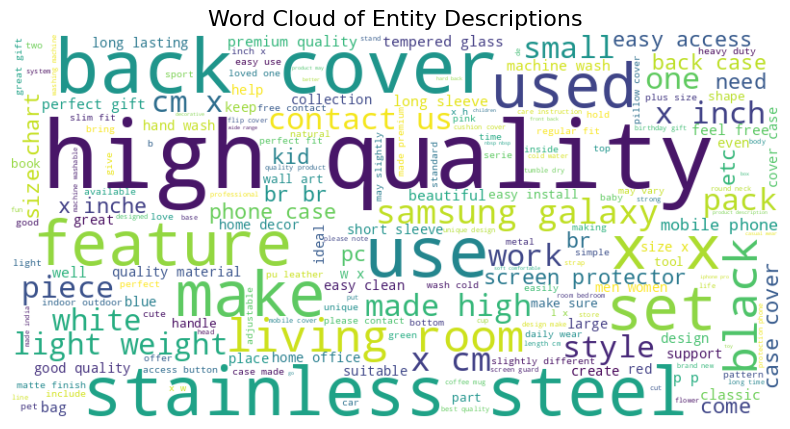

In [22]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Entity Descriptions', fontsize=16)
plt.show()

In [23]:

top_20_words = Counter(all_words.split()).most_common(20)
top_words_df = pd.DataFrame(top_20_words, columns=['Word', 'Count'])


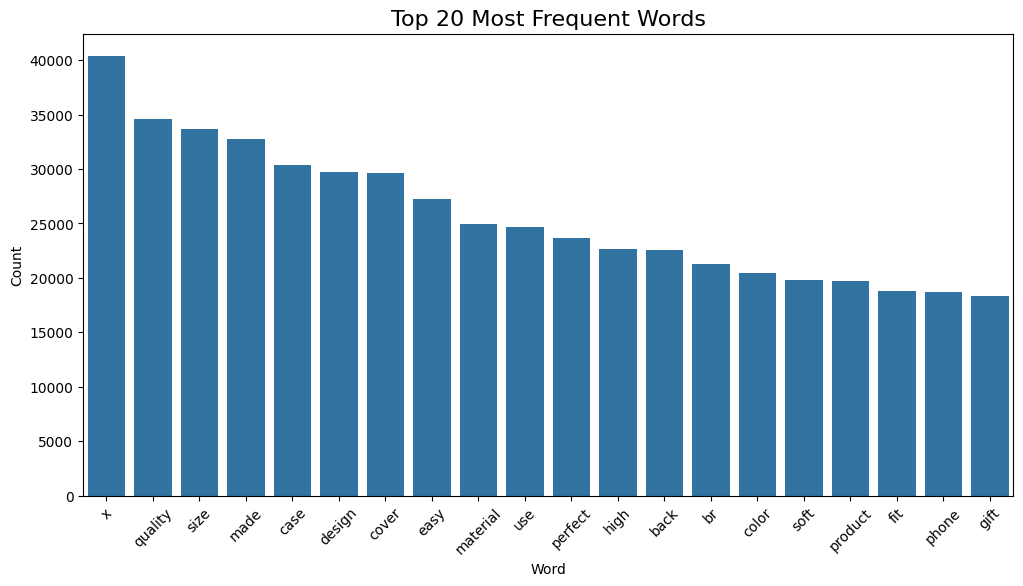

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Count', data=top_words_df)
plt.title('Top 20 Most Frequent Words', fontsize=16)
plt.xticks(rotation=45)
plt.show()

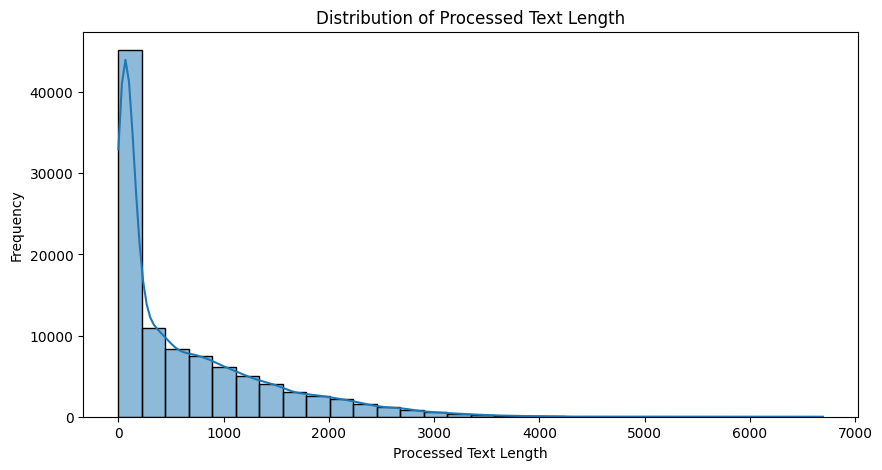

In [27]:

train_data['TEXT_LENGTH'] = train_data['CLEAN_TEXT'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(train_data['TEXT_LENGTH'], bins=30, kde=True)
plt.title('Distribution of Processed Text Length')
plt.xlabel('Processed Text Length')
plt.ylabel('Frequency')
plt.show()
